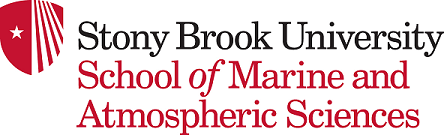

In [132]:
os.chdir("C:/Users/Glarange/Google Drive/Stony/MAR_570")
from IPython.display import Image
Image(filename='C:/Users/Glarange/Google Drive/Stony/MAR_570/SBU SoMarineASciences_2clr.png') 

##  MAR 570 - Fall 2019 - Profs. S.Hameed & R.Wilson
### Gui Larangeira - PCA Decomposition for NYISO electric loads and renewable resources

### 0. Import the required libraries 

In [84]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import os
import numpy as np
from scipy.linalg import inv, solve, det, norm
from numpy import linalg
#from scipy import stats as st
import statistics as st
from scipy.stats import norm
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

### 1. Import and visualize the data

The data corresponds to the **monthly electric energy consumption** for each of the 11 NYISO defined load zones in the state of New YorK (shown in map below):

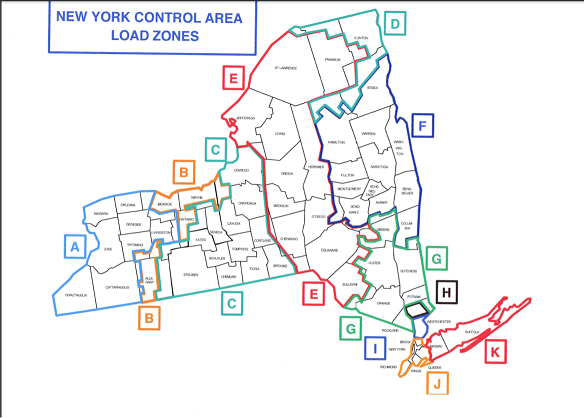

In [159]:
# Import the Data as a Pandas data frame (Loads in KWh)
df = pd.read_csv("C:/Users/Glarange/Google Drive/Stony/MAR_570/project_data/Load/NYISO_Load_200812_full.csv", index_col=0)
df_temp = pd.read_csv("C:/Users/Glarange/Google Drive/Stony/MAR_570/project_data/NY_monthly_temp.csv", index_col=0)
loadzones = df.columns.values
index = df.index.values
Image(filename='C:/Users/Glarange/Google Drive/Stony/MAR_570/NYISO_Load_Zones.png')

In [5]:
# Pull the values from the data-frame, end up with the numpy matrix
X = df.values
load_names = df.columns.values

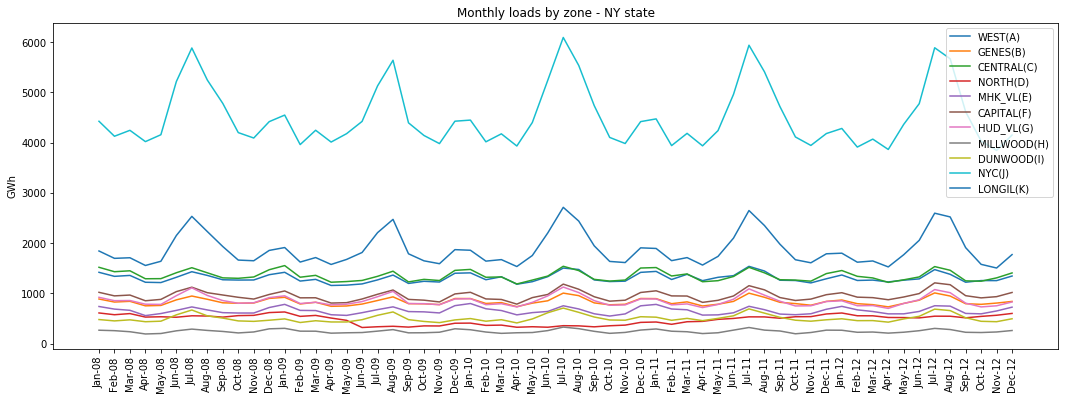

In [6]:
# Plot the 11 variables x_k
plt.figure(figsize=(18,6))
plt.plot(df, label = df.columns.values)
plt.title('Monthly loads by zone - NY state')
plt.ylabel('GWh')
plt.xticks(rotation=90)
plt.legend(['WEST(A)', 'GENES(B)', 'CENTRAL(C)', 'NORTH(D)', 'MHK_VL(E)',    
    'CAPITAL(F)', 'HUD_VL(G)', 'MILLWOOD(H)', 'DUNWOOD(I)', 'NYC(J)','LONGIL(K)']);
plt.show()

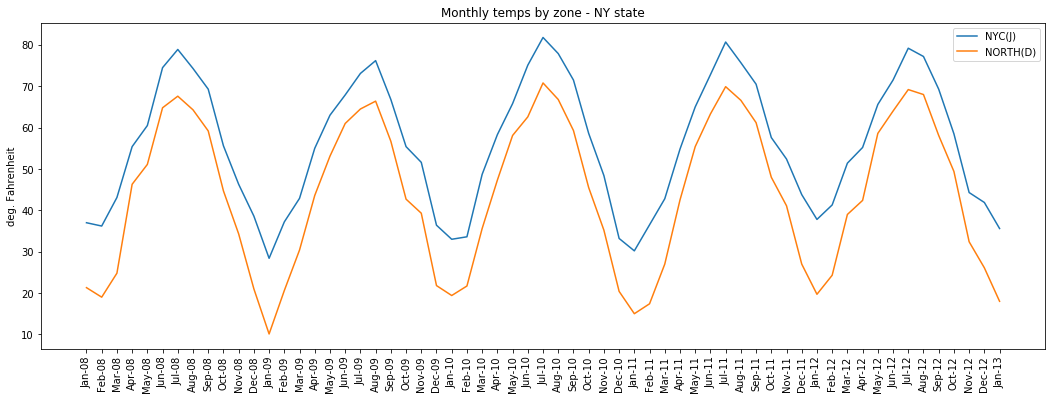

In [160]:
plt.figure(figsize=(18,6))
plt.plot(df_temp)
plt.title('Monthly temps by zone - NY state')
plt.ylabel('deg. Fahrenheit')
plt.xticks(rotation=90)
plt.legend(['NYC(J)', 'NORTH(D)']);
plt.show()

### 1.2 Calculate the covariance and correlation matrices
Consider the covariance between 11 load zones

Form a data matrix [X] [60x11] where rows are months and columns are lodas. X=[zone A,...,zone K]

Must demean [X] according to 10.4 <br>
Xdm  =        X   -  ones(60) * X/60 <br>
[31x6] =  [31x6] - [31x31]   [31x6];

Compute covariance matrix [S] according to eq(10.30) <br>
S  =    Xdm' *  Xdm/(60-1) <br>
[6x6]=   [6x31]  [31x6]


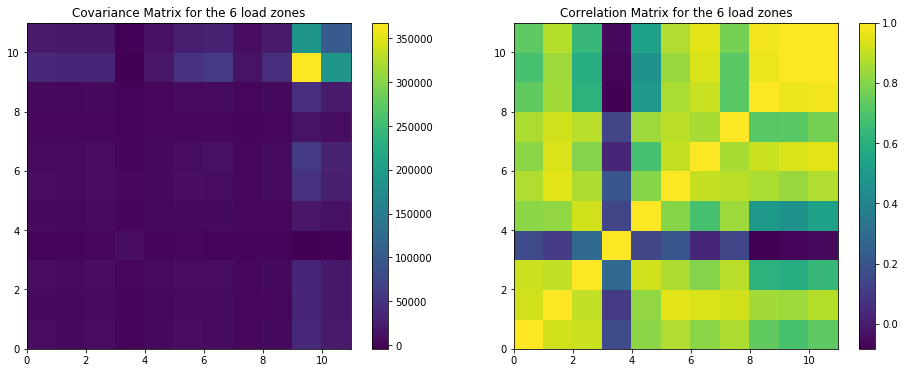

In [80]:
# Calculate the covariance matrix
n = X.shape[0]                  # number of rows
ones = np.ones((n,n))
# X_dm = X - ones @ X/n           # demean the matrix, only Python 3.6
X_dm = X - np.dot(ones,X/n)
#S = X_dm.transpose() @ X_dm/(n-1)  
S = np.dot(X_dm.transpose(), X_dm/(n-1))

k = S.shape[0]
D = np.zeros((k,k))

for k in range(k):
    D[k,k] = np.sqrt(S[k,k])
#R = linalg.inv(D) @ S @ linalg.inv(D)
R = np.dot(np.dot(linalg.inv(D), S), linalg.inv(D))

plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.pcolor(S)
plt.title('Covariance Matrix for the 6 load zones')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.pcolor(R)
plt.title('Correlation Matrix for the 6 load zones')
plt.colorbar()

### 1.2 Calculate the eigenvectors and eigenvalues of the covariance and correlation matrices

Rescaling the data **did not alter the eigenvectors**, just the eigenvalues. The eigenvectors from the **covariance matrix**:

In [100]:
e_S = linalg.eig(S)
e = e_S[0]         # the eigenvalues
E = e_S[1]         # the eigenvectors
idx = e.argsort()[::-1]   
e_sort = e[idx]
E_sort = E[:,idx]
idx = 0 
dfE = pd.DataFrame(E_sort)
dfe = pd.DataFrame(e_sort).transpose()
dfE = dfE.append(dfe)

dfE.columns = (['mode_1', 'mode_2', 'mode_3', 'mode_4','mode_5', 'mode_6','mode_7','mode_8','mode_9', 'mode_10', 'mode_11'])
dfE.index = (['elem. 1','2','3','4','5','6','7','8','9','10','11', "Eigenvalues"])
printmd("**Covariance Eigenvectors and Eigenvalues**")
dfE.round(2)

**Covariance Eigenvectors and Eigenvalues**

,mode_1,mode_2,mode_3,mode_4,mode_5,mode_6,mode_7,mode_8,mode_9,mode_10,mode_11
elem. 1,0.09,0.38,0.21,-0.39,0.71,-0.01,-0.24,-0.01,0.10,-0.06,0.28
2,0.08,0.22,0.12,-0.00,0.04,-0.08,-0.15,0.46,-0.75,0.06,-0.35
3,0.09,0.54,0.20,-0.28,-0.25,-0.04,0.41,-0.25,0.15,0.41,-0.32
4,-0.01,0.42,-0.89,0.02,0.02,-0.08,-0.08,-0.08,-0.04,-0.08,-0.01
5,0.05,0.35,0.27,0.28,-0.34,0.14,-0.52,-0.46,-0.10,-0.30,0.06
6,0.12,0.32,0.03,0.45,0.03,0.60,0.18,0.42,0.16,0.14,0.25
7,0.14,0.17,0.08,-0.27,-0.41,-0.27,0.31,0.28,-0.08,-0.46,0.50
8,0.04,0.13,0.07,0.06,-0.05,-0.22,-0.23,0.43,0.58,-0.33,-0.50
9,0.10,0.00,0.04,0.16,0.33,0.19,0.52,-0.26,-0.15,-0.60,-0.32
10,0.85,-0.24,-0.14,-0.27,-0.11,0.27,-0.15,-0.03,0.03,0.02,-0.09


In [102]:
e_Rr = linalg.eig(R)
e_R = e_Rr[0]         # the eigenvalues
E_R = e_Rr[1]         # the eigenvectors

idx = e_R.argsort()[::-1]   
eR_sort = e_R[idx]
ER_sort = E_R[:,idx]

dfER = pd.DataFrame(ER_sort)
dfeR = pd.DataFrame(eR_sort).transpose()
dfER = dfER.append(dfeR)
#dfE.insert(loc=idx, column='Sample Var.', value=var)   

dfER.columns = (['mode_1', 'mode_2', 'mode_3', 'mode_4','mode_5', 'mode_6','mode_7','mode_8','mode_9', 'mode_10', 'mode_11'])
dfER.index = (['elem. 1','2','3','4','5','6','7','8','9','10','11', "Eigenvalues"])
printmd("**Correlation Eigenvectors and Eigenvalues**")
dfER.round(3)

**Correlation Eigenvectors and Eigenvalues**

,mode_1,mode_2,mode_3,mode_4,mode_5,mode_6,mode_7,mode_8,mode_9,mode_10,mode_11
elem. 1,-0.315,-0.165,0.144,-0.799,0.154,-0.108,-0.159,-0.166,0.314,-0.136,0.091
2,-0.341,-0.032,0.052,-0.075,0.043,0.048,-0.490,0.656,-0.433,0.039,-0.108
3,-0.307,-0.326,0.187,-0.104,-0.035,0.478,0.504,-0.009,-0.159,0.484,-0.104
4,-0.037,-0.635,-0.748,0.043,0.001,-0.008,-0.122,-0.116,-0.061,-0.044,-0.009
5,-0.278,-0.330,0.444,0.353,-0.426,-0.031,-0.365,-0.398,-0.001,-0.131,-0.037
6,-0.335,-0.064,-0.082,0.117,-0.428,-0.378,0.363,0.466,0.417,-0.067,0.104
7,-0.332,0.137,-0.092,0.190,0.179,0.574,0.103,0.031,0.099,-0.614,0.259
8,-0.320,-0.135,0.146,0.330,0.709,-0.446,0.173,-0.082,-0.056,-0.008,-0.088
9,-0.307,0.321,-0.201,-0.198,-0.271,-0.253,0.275,-0.307,-0.592,-0.226,-0.122
10,-0.304,0.345,-0.257,0.091,0.010,0.147,-0.187,-0.130,0.384,0.186,-0.677


### 2. Fractional Variation using covariance and correlation matrices

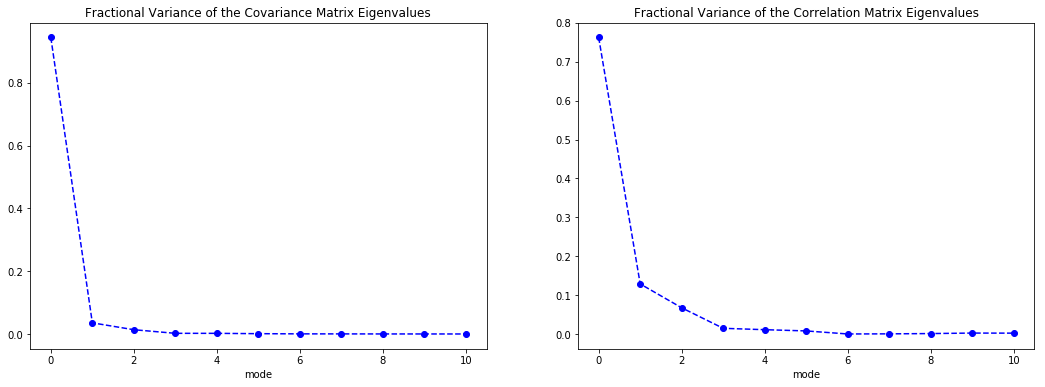

In [73]:
plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)
plt.plot(e_sort/np.sum(e_sort),linestyle='--', marker='o', color='b')
plt.xlabel('mode')
plt.title('Fractional Variance of the Covariance Matrix Eigenvalues')
e_sort/np.sum(e_sort)

plt.subplot(1, 2, 2)
plt.plot(e_R/np.sum(e_R),linestyle='--', marker='o', color='b')
plt.xlabel('mode')
plt.title('Fractional Variance of the Correlation Matrix Eigenvalues')
plt.show()

### 2.1 Eigenvectors Trunacation: Apply North and Confidence Intervals methods

In [135]:
# Truncating the eigenvectors, eigenvalues
# For covariance matrix using North's rule of thumb

dif = pd.DataFrame((e_sort[0:10]-e_sort[1:11]).transpose())
h = (2/n)**.5
denom_p = 1 + norm.ppf(1-.05/2)*h
denom_m = 1 - norm.ppf(1-.05/2)*h
delta = pd.DataFrame((h * e_sort).transpose())
eigs = pd.DataFrame(e_sort.transpose())
UL = eigs/denom_m
BL = eigs/denom_p

north = pd.concat([eigs,dif,delta, BL, UL], axis=1)
north.columns = ['CoVAR Eigs.','spacing','sampl. error', 'BL CI', 'UL CI']
north.round(1)

,CoVAR Eigs.,spacing,sampl. error,BL CI,UL CI
0,501949.0,483057.9,91642.9,369667.6,781655.8
1,18891.1,11631.5,3449.0,13912.6,29418.0
2,7259.6,6100.4,1325.4,5346.4,11304.9
3,1159.2,37.4,211.6,853.7,1805.1
4,1121.8,561.8,204.8,826.2,1746.9
5,560.0,310.9,102.2,412.4,872.1
6,249.2,63.6,45.5,183.5,388.0
7,185.6,80.4,33.9,136.7,289.0
8,105.2,24.4,19.2,77.5,163.8
9,80.8,25.0,14.7,59.5,125.8


** Analysis of the relevant eigenvectors**<br>
We use the North Rule and Confidence Intervals: In the first, look at **row 3, where spacing is smaller than the sampling error for first time.** So we keep 0, 1 and 2, the first 3. Likewise, using CIs, we see **CIs in rows 3 and 4 (and subsequent) overlap** so keep 0, 1 and 2.

### 3. First eigenvector and its interpretation

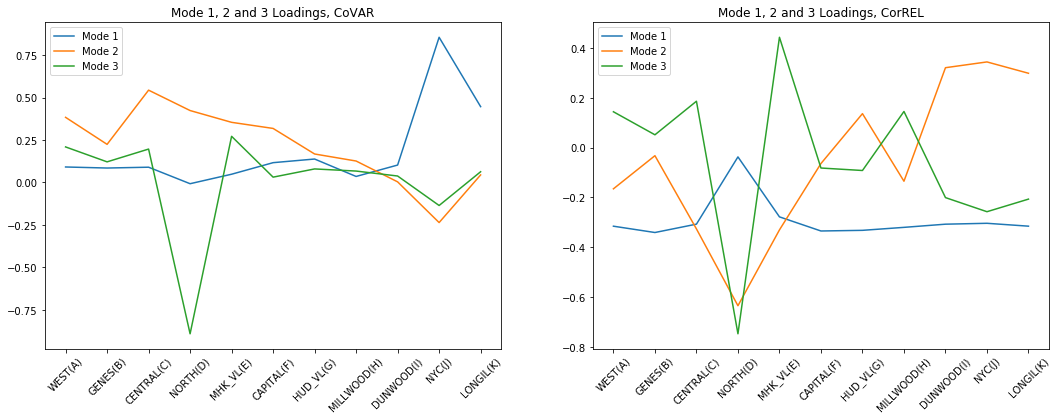

In [103]:
plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)
plt.plot(load_names,E[:,0], label = 'Mode 1')
plt.plot(E[:,1], label = 'Mode 2')
plt.plot(E[:,2], label = 'Mode 3')
plt.title('Mode 1, 2 and 3 Loadings, CoVAR')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(load_names,E_R[:,0], label = 'Mode 1')
plt.plot(E_R[:,1], label = 'Mode 2')
plt.plot(E_R[:,2], label = 'Mode 3')
plt.title('Mode 1, 2 and 3 Loadings, CorREL')
plt.xticks(rotation=45)
plt.legend()
plt.show()

**Interpretation of 1st mode Eigenvector**: The first eigenvector of the covariance-computed set has the direction of greatest variation of the data. It is no surprise then that the largest loadings correspond to the columns (zones) with largest variation, namely NYC and Long Island.

### 4. Plotting the principal components, actual vs **first, second modes approximations**

The *new* coordinates $u$, principal component coordinates in the new eigenvector basis $\mathbf{u}=[E]^T\mathbf{x'}$. 

Resynthezing with just the first mode:
$\mathbf{x'}\approx\mathbf{e_1}u_1$ 

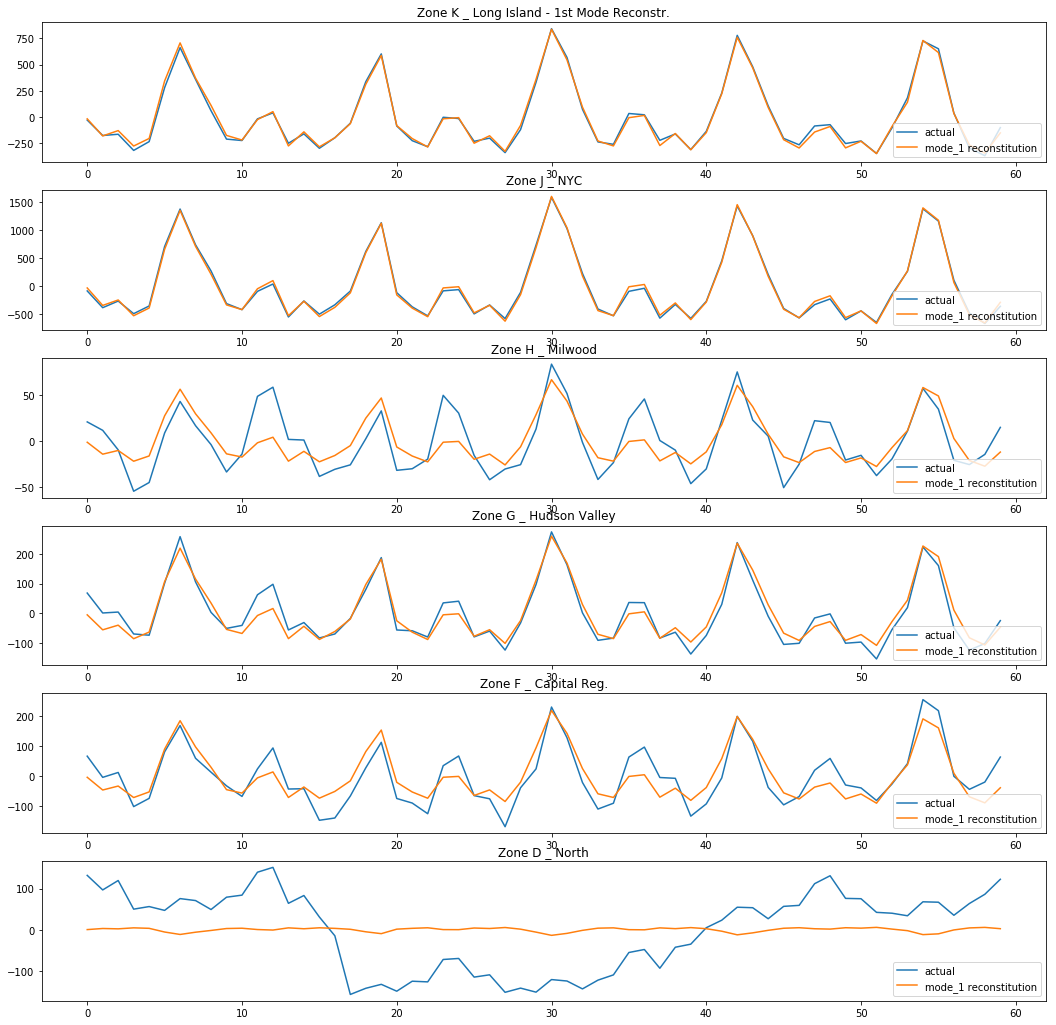

In [143]:
e_1 = E_sort[:,0].reshape(11,1)
u_1 =  X_dm @ e_1
x_1 =  u_1 @ e_1.transpose() 

plt.figure(figsize=(18,18))

plt.subplot(6, 1, 1)
plt.plot(X_dm[:,10], label = 'actual')
plt.plot(x_1[:,10], label = "mode_1 reconstitution")
plt.legend(loc='lower right')
plt.title("Zone K _ Long Island - 1st Mode Reconstr.")

plt.subplot(6, 1, 2)
plt.plot(X_dm[:,9], label = 'actual')
plt.plot(x_1[:,9], label = "mode_1 reconstitution")
plt.legend(loc='lower right')
plt.title("Zone J _ NYC")

plt.subplot(6, 1, 3)
plt.plot(X_dm[:,7], label = 'actual')
plt.plot(x_1[:,7], label = "mode_1 reconstitution")
plt.legend(loc='lower right')
plt.title("Zone H _ Milwood")

plt.subplot(6, 1, 4)
plt.plot(X_dm[:,6], label = 'actual')
plt.plot(x_1[:,6], label = "mode_1 reconstitution")
plt.legend(loc='lower right')
plt.title("Zone G _ Hudson Valley")

plt.subplot(6, 1, 5)
plt.plot(X_dm[:,5], label = 'actual')
plt.plot(x_1[:,5], label = "mode_1 reconstitution")
plt.legend(loc='lower right')
plt.title("Zone F _ Capital Reg.")

plt.subplot(6, 1, 6)
plt.plot(X_dm[:,3], label = 'actual')
plt.plot(x_1[:,3], label = "mode_1 reconstitution")
plt.legend(loc='lower right')
plt.title("Zone D _ North")

plt.show()

But we could do same **reconstruction** using the second and third modes.

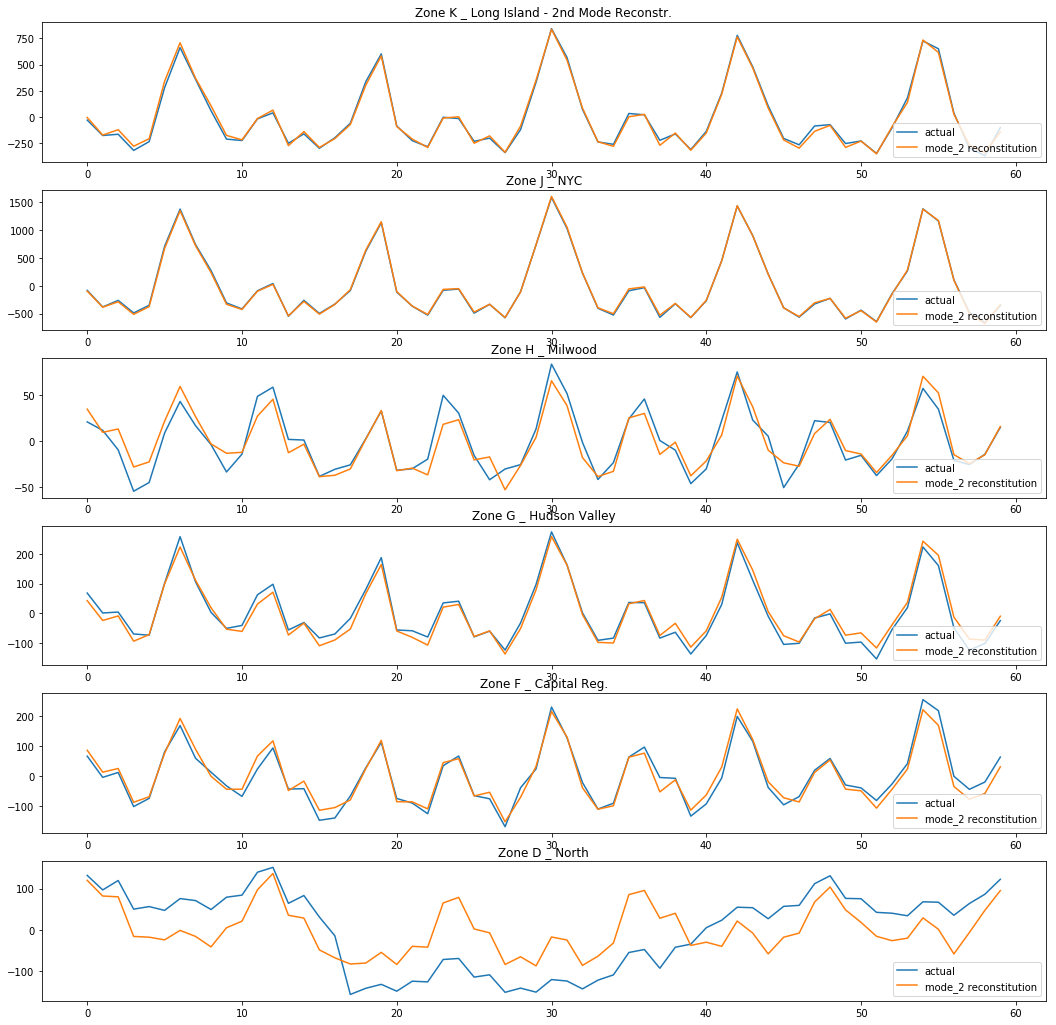

In [161]:
e_2 = E_sort[:,0:2].reshape(11,2)
u_2 =  X_dm @ e_2
x_2 =  u_2 @ e_2.transpose() 

plt.figure(figsize=(18,18))

plt.subplot(6, 1, 1)
plt.plot(X_dm[:,10], label = 'actual')
plt.plot(x_2[:,10], label = "mode_2 reconstitution")
plt.legend(loc='lower right')
plt.title("Zone K _ Long Island - 2nd Mode Reconstr.")

plt.subplot(6, 1, 2)
plt.plot(X_dm[:,9], label = 'actual')
plt.plot(x_2[:,9], label = "mode_2 reconstitution")
plt.legend(loc='lower right')
plt.title("Zone J _ NYC")

plt.subplot(6, 1, 3)
plt.plot(X_dm[:,7], label = 'actual')
plt.plot(x_2[:,7], label = "mode_2 reconstitution")
plt.legend(loc='lower right')
plt.title("Zone H _ Milwood")

plt.subplot(6, 1, 4)
plt.plot(X_dm[:,6], label = 'actual')
plt.plot(x_2[:,6], label = "mode_2 reconstitution")
plt.legend(loc='lower right')
plt.title("Zone G _ Hudson Valley")

plt.subplot(6, 1, 5)
plt.plot(X_dm[:,5], label = 'actual')
plt.plot(x_2[:,5], label = "mode_2 reconstitution")
plt.legend(loc='lower right')
plt.title("Zone F _ Capital Reg.")

plt.subplot(6, 1, 6)
plt.plot(X_dm[:,3], label = 'actual')
plt.plot(x_2[:,3], label = "mode_2 reconstitution")
plt.legend(loc='lower right')
plt.title("Zone D _ North")

plt.show()

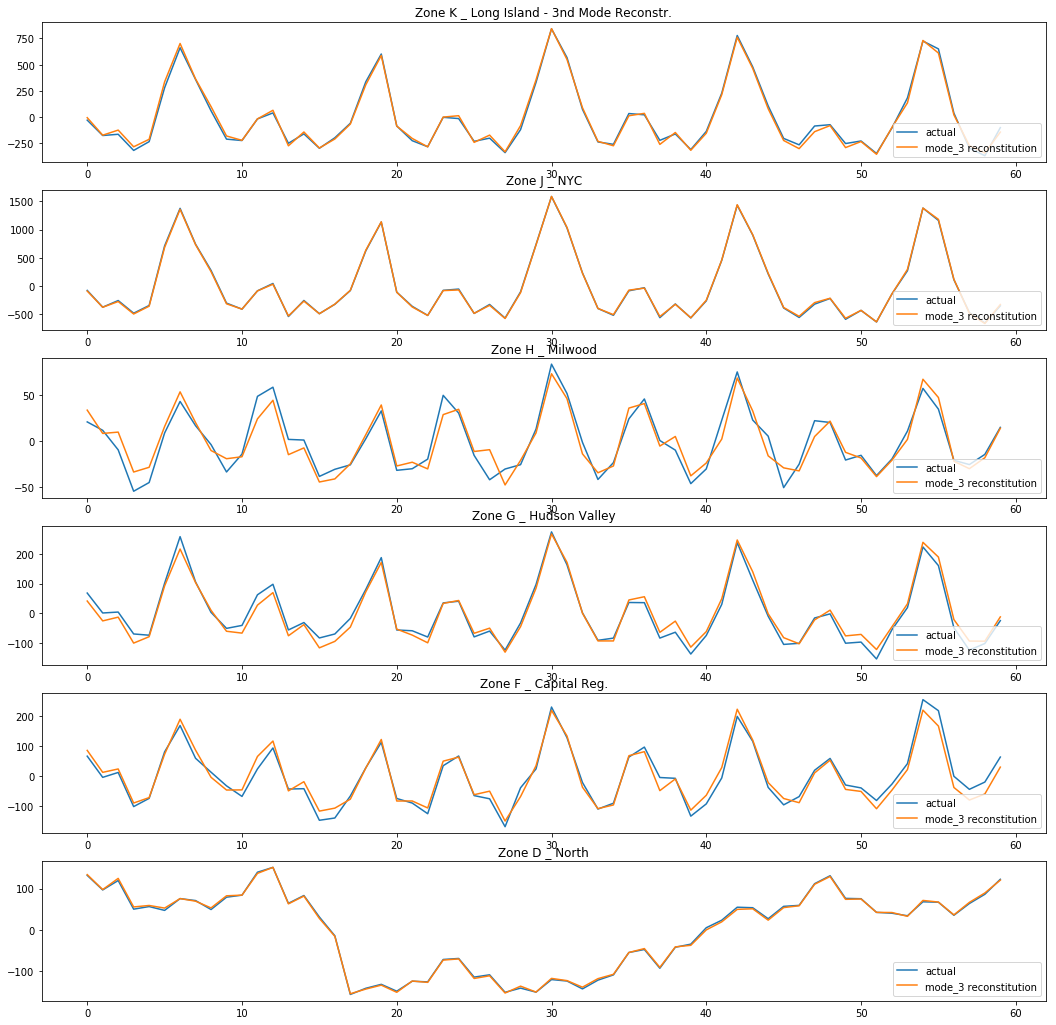

In [163]:
e_3 = E_sort[:,0:3].reshape(11,3)
u_3 =  X_dm @ e_3
x_3 =  u_3 @ e_3.transpose() 

plt.figure(figsize=(18,18))

plt.subplot(6, 1, 1)
plt.plot(X_dm[:,10], label = 'actual')
plt.plot(x_3[:,10], label = "mode_3 reconstitution")
plt.legend(loc='lower right')
plt.title("Zone K _ Long Island - 3nd Mode Reconstr.")

plt.subplot(6, 1, 2)
plt.plot(X_dm[:,9], label = 'actual')
plt.plot(x_3[:,9], label = "mode_3 reconstitution")
plt.legend(loc='lower right')
plt.title("Zone J _ NYC")

plt.subplot(6, 1, 3)
plt.plot(X_dm[:,7], label = 'actual')
plt.plot(x_3[:,7], label = "mode_3 reconstitution")
plt.legend(loc='lower right')
plt.title("Zone H _ Milwood")

plt.subplot(6, 1, 4)
plt.plot(X_dm[:,6], label = 'actual')
plt.plot(x_3[:,6], label = "mode_3 reconstitution")
plt.legend(loc='lower right')
plt.title("Zone G _ Hudson Valley")

plt.subplot(6, 1, 5)
plt.plot(X_dm[:,5], label = 'actual')
plt.plot(x_3[:,5], label = "mode_3 reconstitution")
plt.legend(loc='lower right')
plt.title("Zone F _ Capital Reg.")

plt.subplot(6, 1, 6)
plt.plot(X_dm[:,3], label = 'actual')
plt.plot(x_3[:,3], label = "mode_3 reconstitution")
plt.legend(loc='lower right')
plt.title("Zone D _ North")

plt.show()

### 6. Rotate the eigenvectors